# Dish Recognition using transfer learning

1. Model: EffecientNet - B0
2. weight: ImageNet

*Data were saved by numpy in driver folder.*

In [1]:
#import
import os
import glob
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense, Input, GlobalAveragePooling2D, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score

In [2]:
#Define path mount to driver data
Train_data_path = '/content/drive/MyDrive/DATASET/output/train'
Test_data_path = '/content/drive/MyDrive/DATASET/output/test'
Val_data_path = '/content/drive/MyDrive/DATASET/output/val'

In [3]:
LABELS = ['Banh chung','Banh mi', 'Banh tet', 'Banh trang', 'Banh xeo', 'Bun', 'Com tam', 'Goi cuon', 'Pho', 'Bun dau mam tom', 'Nem chua', 'Chao long']

In [6]:
def load(path):
  feature = []
  target = []
  for label in LABELS:
    one_hots = tf.one_hot(LABELS.index(label), len(LABELS)).numpy()

    base_path = os.path.join(path, label, 'extract_Effecient_NoAug.npy')
    feature_load = np.load(base_path)
    feature.append(feature_load)

    one_hots = np.tile(one_hots, (len(feature_load), 1))
    target.append(one_hots)

  feature = np.concatenate(feature, axis= 0)
  target = np.concatenate(target, axis= 0)
  return feature, target

In [5]:
X_train, y_train = load(Train_data_path)

In [7]:
X_val, y_val = load(Val_data_path)

In [11]:
X_train.shape

(16086, 7, 7, 1280)

In [12]:
#drop featute
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [13]:
X_train.shape

(11260, 7, 7, 1280)

**Create Model**

In [14]:
inputs = Input(shape= (7, 7, 1280))
x = GlobalAveragePooling2D(name="avg_pool")(inputs)
x = BatchNormalization()(x)

top_dropout_rate = 0.2
x = Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = Dense(12, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="Recognition")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.summary()

Model: "Recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 7, 1280)]      0         
                                                                 
 avg_pool (GlobalAveragePoo  (None, 1280)              0         
 ling2D)                                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                                 
 pred (Dense)                (None, 12)                15372     
                                                                 
Total params: 20492 (80.05 KB)
Trainable params: 17932 

**Training**

In [16]:
epochs = 30
batch_size = 32
hist = model.fit(X_train, y_train, epochs= epochs, batch_size= batch_size, shuffle= True, validation_data=(X_val, y_val))

Epoch 1/30
352/352 [==============================] - 11s 11ms/step - loss: 1.9648 - accuracy: 0.4088 - val_loss: 1.0055 - val_accuracy: 0.6999
Epoch 2/30
352/352 [==============================] - 3s 7ms/step - loss: 0.9417 - accuracy: 0.6994 - val_loss: 0.6638 - val_accuracy: 0.8015
Epoch 3/30
352/352 [==============================] - 3s 7ms/step - loss: 0.7061 - accuracy: 0.7717 - val_loss: 0.5462 - val_accuracy: 0.8354
Epoch 4/30
352/352 [==============================] - 3s 7ms/step - loss: 0.5828 - accuracy: 0.8107 - val_loss: 0.4898 - val_accuracy: 0.8519
Epoch 5/30
352/352 [==============================] - 3s 8ms/step - loss: 0.5114 - accuracy: 0.8358 - val_loss: 0.4527 - val_accuracy: 0.8616
Epoch 6/30
352/352 [==============================] - 3s 9ms/step - loss: 0.4648 - accuracy: 0.8506 - val_loss: 0.4276 - val_accuracy: 0.8703
Epoch 7/30
352/352 [==============================] - 3s 9ms/step - loss: 0.4233 - accuracy: 0.8639 - val_loss: 0.4120 - val_accuracy: 0.8790
Epoc

In [17]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

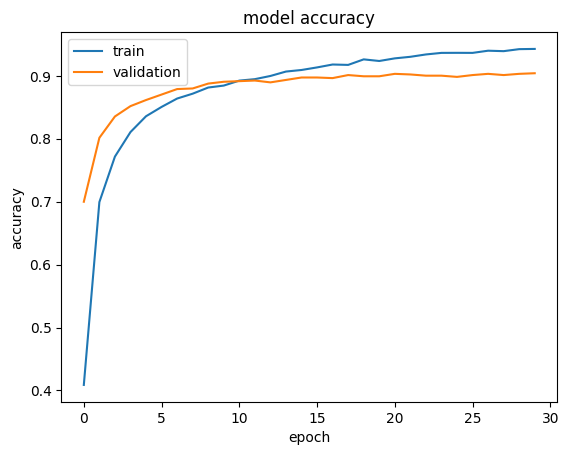

In [18]:
plot_hist(hist)

**Save model**

In [19]:
save_model_path = '/content/drive/MyDrive/DATASET/Dish_Recognition_12.h5'
model.save(save_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Test model**

In [20]:
X_test, y_test = load(Test_data_path)

In [21]:
y_pred = model.predict(X_test)

41/41 [==============================] - 0s 6ms/step


In [22]:
#one hot output
y_pred = np.eye(np.array(y_pred).shape[1])[np.argmax(y_pred, axis=1)]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9071373752877974

# Test

In [ ]:
#load npy file
feature = []
for label in LABELS:
  path = os.path.join(Val_data_path, label, 'extract_Effecient.npy')
  feature.append(np.load(path))

In [ ]:
feature = np.concatenate(feature, axis=0)

In [ ]:
import numpy as np

# Tạo một array mẫu
arr = np.array([1, 5, 6, 8])

# Sử dụng np.tile() để tạo array mới
new_arr = np.tile(arr, (10, 1))  # Lặp lại arr 10 lần theo chiều 0

print(new_arr)
print(new_arr.shape)

[[1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]
 [1 5 6 8]]
(10, 4)


In [ ]:
from keras.models import load_model
new_model = load_model(save_model_path)

In [ ]:
new_pred = new_model.predict(X_test)

25/25 [==============================] - 0s 9ms/step


In [ ]:
new_pred = np.eye(np.array(new_pred).shape[1])[np.argmax(new_pred, axis=1)]

In [ ]:
accuracy_score(y_test, new_pred)

0.89937106918239